Check the result

In [1]:
import pandas as pd
question_df = pd.read_json("eval_result_11_29.json", lines=True)

In [8]:
observe_df = question_df.drop(['first_session_dialogue', 'second_session_dialogue', 'third_session_dialogue', 'fourth_session_dialogue', 'fifth_session_dialogue'], axis=1)
print(observe_df['short_score'].astype(int).sum()/500)
print(observe_df['long_score'].astype(int).sum()/500)
print(observe_df['long_recall_score'].astype(int).sum()/500)
print(observe_df['base_dialog_score'].astype(int).sum()/500)
print(observe_df['base_paragraph_score'].astype(int).sum()/500)

7.794
9.03
9.254
7.746
6.648


In [65]:
question_df_k2 = pd.read_json("eval_result_12_03_k2.json", lines=True)
observe_df = question_df_k2.drop(['first_session_dialogue', 'second_session_dialogue', 'third_session_dialogue', 'fourth_session_dialogue', 'fifth_session_dialogue'], axis=1)[:50]
print(observe_df['short_score'].astype(int).sum()/50)
print(observe_df['long_score'].astype(int).sum()/50)
print(observe_df['long_recall_score'].astype(int).sum()/50)
print(observe_df['base_dialog_score'].astype(int).sum()/50)
print(observe_df['base_paragraph_score'].astype(int).sum()/50)

7.16
8.72
9.18
7.04
6.22


In [9]:
# 低於 score 的數量
score = 5
print((question_df['short_score'].astype(int) < score).sum())
print((question_df['long_score'].astype(int) < score).sum())
print((question_df['long_recall_score'].astype(int) < score).sum())
print((question_df['base_dialog_score'].astype(int) < score).sum())
print((question_df['base_paragraph_score'].astype(int) < score).sum())

6
4
4
2
7


In [10]:
# 中位數
print((question_df['short_score'].astype(int).median()))
print((question_df['long_score'].astype(int).median()))
print((question_df['long_recall_score'].astype(int).median()))
print((question_df['base_dialog_score'].astype(int).median()))
print((question_df['base_paragraph_score'].astype(int).median()))

8.0
9.0
10.0
8.0
7.0


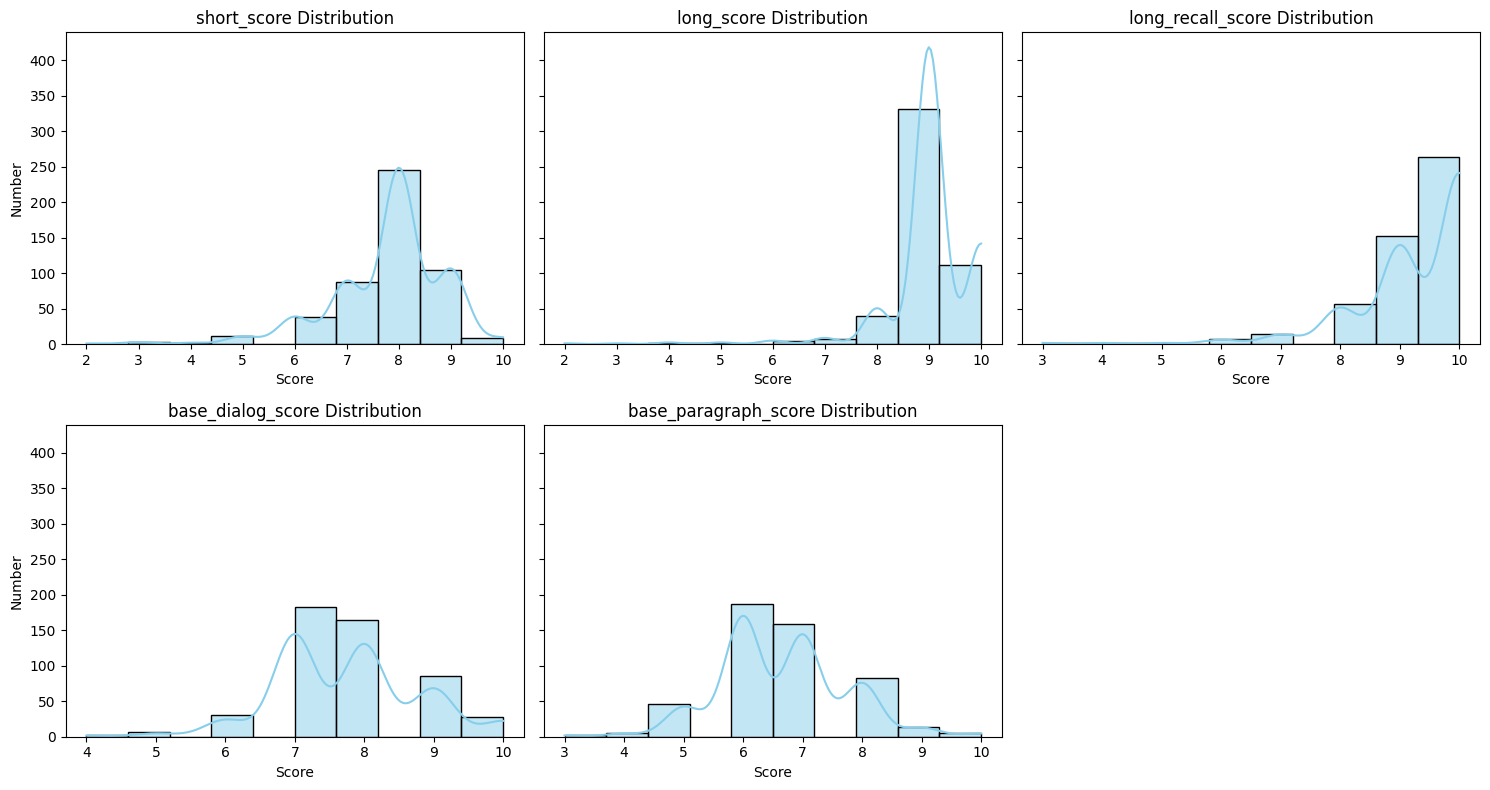

In [16]:
import seaborn as sns
import matplotlib.pyplot as plt

columns = ['short_score', 'long_score', 'long_recall_score', 'base_dialog_score', 'base_paragraph_score']

rows, cols = 2, 3
fig, axes = plt.subplots(rows, cols, figsize=(15, 8), sharey=True)

axes = axes.flatten()

for i, column in enumerate(columns):
    data = question_df[column].astype(int)
    sns.histplot(data, bins=10, kde=True, color='skyblue', edgecolor='black', ax=axes[i])
    axes[i].set_title(f"{column} Distribution")
    axes[i].set_xlabel("Score")
    axes[i].set_ylabel("Number")
    
for i in range(len(columns), len(axes)):
    fig.delaxes(axes[i]) 

plt.tight_layout()
plt.show()


[0, 1, 3, 2, 11, 38, 87, 245, 104, 9]
[0, 1, 1, 2, 2, 4, 7, 40, 331, 112]
[0, 0, 2, 2, 2, 7, 15, 56, 152, 264]
[0, 0, 0, 2, 6, 30, 183, 165, 86, 28]
[0, 0, 2, 5, 46, 187, 158, 83, 14, 5]


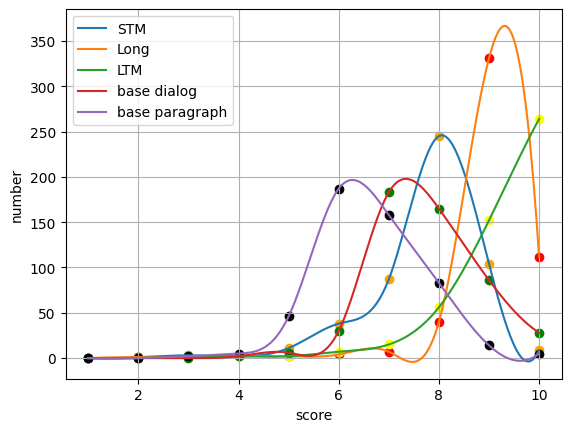

In [13]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.interpolate import make_interp_spline

x = np.array(range(1, 11))
x_smooth = np.linspace(x.min(), x.max(), 300)

y = np.array([question_df['short_score'].to_list().count(i) for i in x])
print(y.tolist())
y_smooth = make_interp_spline(x, y)(x_smooth)
plt.plot(x_smooth, y_smooth, label='STM')
plt.scatter(x, y, color='orange') 

y = np.array([question_df['long_score'].to_list().count(i) for i in x])
print(y.tolist())
y_smooth = make_interp_spline(x, y)(x_smooth)
plt.plot(x_smooth, y_smooth, label='Long')
plt.scatter(x, y, color='red') 

y = np.array([question_df['long_recall_score'].to_list().count(i) for i in x])
print(y.tolist())
y_smooth = make_interp_spline(x, y)(x_smooth)
plt.plot(x_smooth, y_smooth, label='LTM')
plt.scatter(x, y, color='yellow') 

y = np.array([question_df['base_dialog_score'].to_list().count(i) for i in x])
print(y.tolist())
y_smooth = make_interp_spline(x, y)(x_smooth)
plt.plot(x_smooth, y_smooth, label='base dialog')
plt.scatter(x, y, color='green') 

y = np.array([question_df['base_paragraph_score'].to_list().count(i) for i in x])
print(y.tolist())
y_smooth = make_interp_spline(x, y)(x_smooth)
plt.plot(x_smooth, y_smooth, label='base paragraph')
plt.scatter(x, y, color='black') 

plt.xlabel('score')
plt.ylabel('number')
plt.legend()
plt.grid(True)
plt.show()

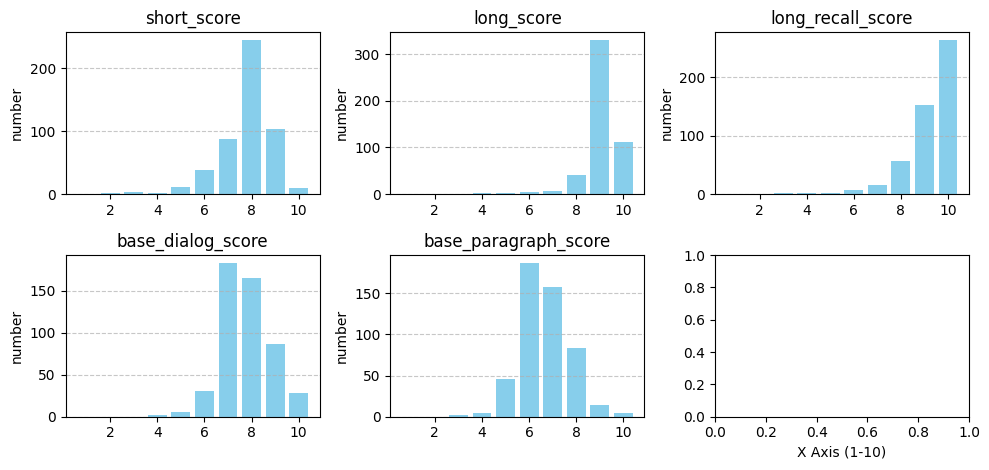

In [30]:
import matplotlib.pyplot as plt
import numpy as np
columns = ['short_score', 'long_score', 'long_recall_score', 'base_dialog_score', 'base_paragraph_score']
# 數據
data = [
    [0, 1, 3, 2, 11, 38, 87, 245, 104, 9],
    [0, 1, 1, 2, 2, 4, 7, 40, 331, 112],
    [0, 0, 2, 2, 2, 7, 15, 56, 152, 264],
    [0, 0, 0, 2, 6, 30, 183, 165, 86, 28],
    [0, 0, 2, 5, 46, 187, 158, 83, 14, 5]
]

x = np.arange(1, 11)  # x 軸是 1~10

# 創建子圖
fig, axes = plt.subplots(2, 3, figsize=(10, 5))

# 展平子圖陣列，方便迭代
axes = axes.flatten()

for i, ax in enumerate(axes[:len(data)]):
    ax.bar(x, data[i], color='skyblue')
    ax.set_title(f'{columns[i]}')
    ax.set_ylabel('number')
    ax.grid(axis='y', linestyle='--', alpha=0.7)

# 設置 x 軸標籤
axes[-1].set_xlabel('X Axis (1-10)')
plt.tight_layout(rect=[0, 0, 1, 0.96])  # 調整布局以防止標題重疊
plt.show()


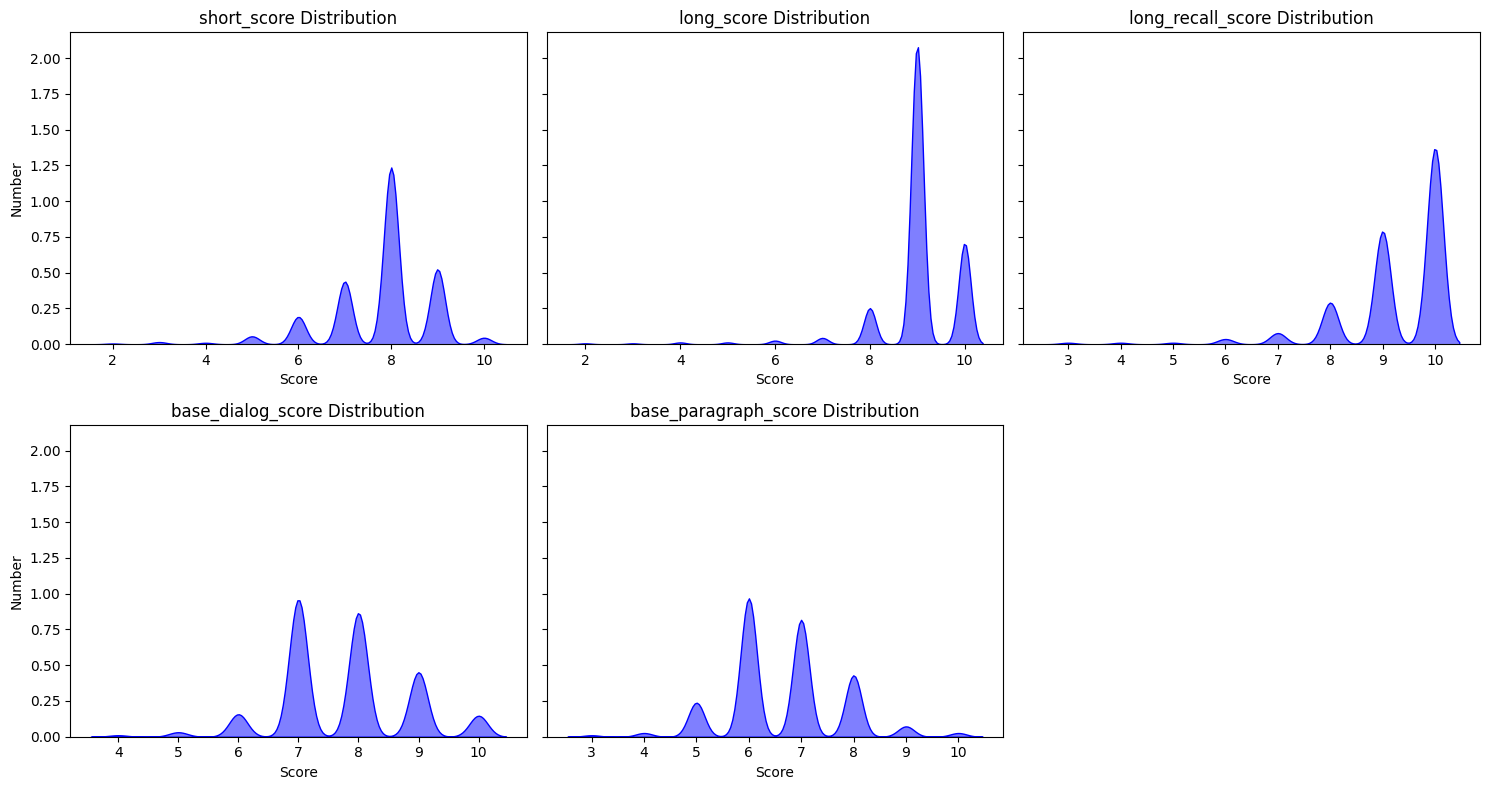

In [2]:
import seaborn as sns
import matplotlib.pyplot as plt

columns = ['short_score', 'long_score', 'long_recall_score', 'base_dialog_score', 'base_paragraph_score']

rows, cols = 2, 3
fig, axes = plt.subplots(rows, cols, figsize=(15, 8), sharey=True)

axes = axes.flatten()

for i, column in enumerate(columns):
    data = question_df[column].astype(int)
    sns.kdeplot(data, color='blue', fill=True, alpha=0.5, bw_adjust=0.5, ax=axes[i])
    axes[i].set_title(f"{column} Distribution")
    axes[i].set_xlabel("Score")
    axes[i].set_ylabel("Number")
    
for i in range(len(columns), len(axes)):
    fig.delaxes(axes[i]) 

plt.tight_layout()
plt.show()


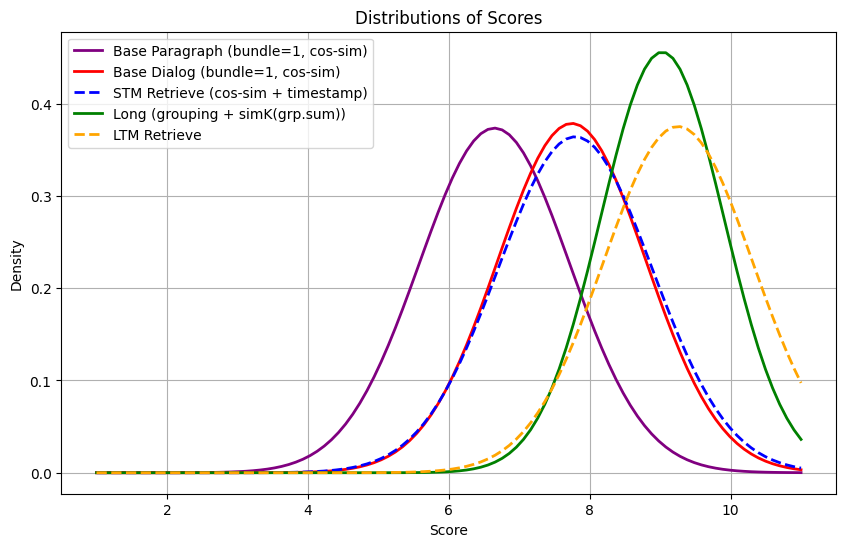

In [67]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as stats

columns = ['short_score', 'long_score', 'long_recall_score', 'base_dialog_score', 'base_paragraph_score']

plt.figure(figsize=(10, 6))

data5 = question_df['base_paragraph_score'].astype(int)
mu5, std5 = stats.norm.fit(data5)
x5 = np.linspace(1, 11, 100)
p5 = stats.norm.pdf(x5, mu5, std5)
plt.plot(x5, p5, color='purple', linewidth=2, label="Base Paragraph (bundle=1, cos-sim)")

data4 = question_df['base_dialog_score'].astype(int)
mu4, std4 = stats.norm.fit(data4)
x4 = np.linspace(1, 11, 100)
p4 = stats.norm.pdf(x4, mu4, std4)
plt.plot(x4, p4, color='red', linewidth=2, label="Base Dialog (bundle=1, cos-sim)")

data1 = question_df['short_score'].astype(int)
mu1, std1 = stats.norm.fit(data1)
x1 = np.linspace(1, 11, 100)
p1 = stats.norm.pdf(x1, mu1, std1)
plt.plot(x1, p1, color='blue', linewidth=2, linestyle='--', label="STM Retrieve (cos-sim + timestamp)")

data2 = question_df['long_score'].astype(int)
mu2, std2 = stats.norm.fit(data2)
x2 = np.linspace(1, 11, 100)
p2 = stats.norm.pdf(x2, mu2, std2)
plt.plot(x2, p2, color='green', linewidth=2, label="Long (grouping + simK(grp.sum))")

data3 = question_df['long_recall_score'].astype(int)
mu3, std3 = stats.norm.fit(data3)
x3 = np.linspace(1, 11, 100)
p3 = stats.norm.pdf(x3, mu3, std3)
plt.plot(x3, p3, color='orange', linewidth=2, linestyle='--', label="LTM Retrieve")

plt.title("Distributions of Scores")
plt.xlabel("Score")
plt.ylabel("Density")
plt.legend()
plt.grid()
plt.show()

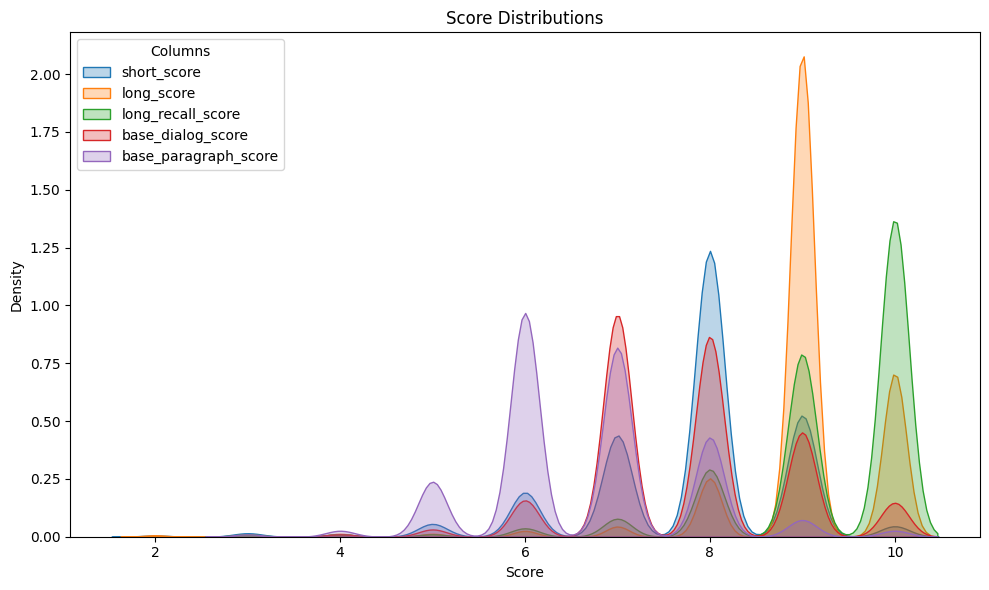

In [3]:
import seaborn as sns
import matplotlib.pyplot as plt

columns = ['short_score', 'long_score', 'long_recall_score', 'base_dialog_score', 'base_paragraph_score']

plt.figure(figsize=(10, 6))

for column in columns:
    data = question_df[column].astype(int)
    sns.kdeplot(data, label=column, fill=True, alpha=0.3, bw_adjust=0.5)

plt.title("Score Distributions")
plt.xlabel("Score")
plt.ylabel("Density")
plt.legend(title="Columns")
plt.tight_layout()
plt.show()


In [33]:
import json

index = 2
print(f"Question: {question_df['question'][index]}")
print(f"Short memory: {question_df['short_score'][index]}")
print(json.dumps(eval(question_df['short_mem_result'][index]), indent=4, ensure_ascii=True))
print(f"\n\nLong memory: {question_df['long_score'][index]}")
print(json.dumps(eval(question_df['long_mem_result'][index]), indent=4, ensure_ascii=True))
print(f"\n\nLong recall memory: {question_df['long_recall_score'][index]}")
print(json.dumps(eval(question_df['long_mem_recall_result'][index]), indent=4, ensure_ascii=True))

Question: {'user': "It's been a while since our last family hike. Do you remember what fruit we found during our last adventure?", 'assistant': 'We found some delicious berries while we were exploring!'}
Short memory: 7
{
    "retrieve_memory": [
        {
            "text": "user:Today's hike was so much fun! I loved exploring the woods with you and the kids., assistant:Yeah, it was awesome! I loved climbing the trees and finding all the berries.",
            "time": "10/06 12:01"
        },
        {
            "text": "user:Thanks, sweetie. I think it's important to keep learning and expanding your knowledge., assistant:I agree. Remember when we went on that hike a couple of years ago and you taught us about all the different plants and animals we saw?",
            "time": "10/06 12:03"
        },
        {
            "text": "user:We used to go on hikes and explore the woods together. It was always so much fun., assistant:Like the time we went hiking and picked berries?",
    

In [25]:
question_df.head()

,dataID,first_session_dialogue,second_session_dialogue,third_session_dialogue,fourth_session_dialogue,fifth_session_dialogue,time_interval,question,short_mem_result,long_mem_result,long_mem_recall_result,base_dialog,base_paragraph,short_score,long_score,long_recall_score,base_dialog_score,base_paragraph_score
0,episode-15761,"[{'user': 'Hi there, how are you doing today?'...",[{'user': 'That looks like an interesting book...,"[{'user': 'Hey there, did you see me riding my...","[{'user': ""It's nice to be back in the neighbo...","[{'user': ""Ugh, my boss keeps calling me on my...","[Now, A few months before, A few hours before,...",{'user': 'What was it that you needed help wit...,{'retrieve_memory': [{'text': 'user:Speaking o...,{'closest_summary': {'text': 'User helped assi...,"{'search times': 1, 'used queries': ['user:Wha...",{'retrieve_memory': [{'text': 'user:Speaking o...,"{'retrieve_memory': [{'text': '[""user:Hi there...",8,9,9,7,6
1,episode-15776,"[{'user': 'Hey, B. Can I talk to you about som...","[{'user': 'Hey, I have some exciting news to s...","[{'user': 'Hey, did I tell you about my bike r...",[{'user': 'I moved in with my grandparents whe...,"[{'user': ""I just can't believe my grandson is...","[Now, A couple of years before, A few days bef...",{'user': 'Do you remember when I shared my big...,"{'retrieve_memory': [{'text': ""user:I got acce...",{'closest_summary': {'text': 'User got accepte...,"{'search times': 1, 'used queries': ['user:Do ...","{'retrieve_memory': [{'text': ""user:I got acce...","{'retrieve_memory': [{'text': '[""user:I got ac...",8,9,10,7,6
2,episode-15784,"[{'user': ""I'm so sick of having to take out t...","[{'user': ""Today's hike was so much fun! I lov...","[{'user': "" I'm just so sick of taking out the...","[{'user': 'Today was amazing, I won the contes...","[{'user': 'When I was ten, I moved in with my ...","[Now, A couple of years before, A few days bef...","{'user': ""It's been a while since our last fam...","{'retrieve_memory': [{'text': ""user:Today's hi...",{'closest_summary': {'text': 'User and assista...,"{'search times': 4, 'used queries': [""user:It'...",{'retrieve_memory': [{'text': 'user:We used to...,"{'retrieve_memory': [{'text': ""['user:We used ...",7,8,6,9,5
3,episode-15787,"[{'user': ""Hey there, Classmates B! What's up?...","[{'user': 'Hey, have you ever witnessed a car ...","[{'user': ""I'm almost done with my work for to...","[{'user': 'You know, I still get emotional thi...","[{'user': 'Hey, what are you reading there?', ...","[Now, A few days before, A few days before, A ...","{'user': ""A few days ago, you mentioned that I...","{'retrieve_memory': [{'text': ""user:Thank you ...",{'closest_summary': {'text': 'Classmates A and...,"{'search times': 1, 'used queries': [""user:A f...","{'retrieve_memory': [{'text': ""user:Thank you ...","{'retrieve_memory': [{'text': '[""user:Hey ther...",6,9,8,5,4
4,episode-15790,"[{'user': ""Hey, how's your day going so far?"",...","[{'user': 'Hey.', 'assistant': 'Hey, everythin...","[{'user': ""I can't stop thinking about the Gra...","[{'user': ""I don't know where the chips went. ...","[{'user': 'Hey, have you seen the book I was l...","[Now, A few months before, A few months before...",{'user': 'Do you remember when we talked about...,"{'retrieve_memory': [{'text': ""user:I'm glad y...","{'closest_summary': {'text': ""User and assista...","{'search times': 1, 'used queries': ['user:Do ...","{'retrieve_memory': [{'text': 'user:Yeah, I re...",{'retrieve_memory': [{'text': '[\'user:The one...,7,10,9,6,5


In [32]:
index=3
print(json.dumps(eval(question_df['long_mem_recall_result'][index]), indent=4, ensure_ascii=True))

{
    "search times": 1,
    "used queries": [
        "user:A few days ago, you mentioned that I hadn't been hanging out with you all. What was the reason you brought that up?"
    ],
    "searched memory": [
        {
            "text": "Classmates A and B discussed their relationship. Classmates A apologized for hurtful comments and agreed to be more considerate.",
            "time": "2024/11/20 14:01"
        }
    ],
    "thought": "The previous discussion highlighted Classmates A's hurtful comments and Classmates B's discomfort, leading to an apology and a commitment to be more considerate. This provides context for why user wasn't hanging out.",
    "evidence": [
        "Classmates A and B discussed their relationship. Classmates A apologized for hurtful comments and agreed to be more considerate.",
        "User expressed personal issues affecting their social life, and assistant offered support on November 15, 2024.",
        "User witnessed a terrible car accident on Novem

In [ ]:
for i in eval(question_df['first_session_dialogue'][index]):
    print(i)

{'user': "I'm so sick of having to take out the trash every single day. It's not fair.", 'assistant': "Why don't you ask me to help you?", 'time': '2024-11-20T14:01:00Z'}
{'user': "Well, you're always so busy with school and your activities, I don't want to add on to your workload.", 'assistant': "But you always tell me that it's important to help out around the house. I can definitely take on the responsibility of taking out the trash some days.", 'time': '2024-11-20T14:02:00Z'}
{'user': "You know what, you're right. I shouldn't assume that you don't have the time to help. Thank you for offering to assist.", 'assistant': "No problem! I'm glad I can help ease your workload. Plus, it's our home too, and we should all contribute to keeping it clean and tidy.", 'time': '2024-11-20T14:03:00Z'}
{'user': "That's a great point. And it's also important to communicate our frustrations instead of holding it in and feeling resentful.", 'assistant': "Definitely. I'm just happy we were able to talk

Ablation test

In [3]:
import pandas as pd
question_df = pd.read_json("ablation_short.json", lines=True)

In [4]:
observe_df = question_df.drop(['first_session_dialogue', 'second_session_dialogue', 'third_session_dialogue', 'fourth_session_dialogue', 'fifth_session_dialogue'], axis=1)[:300]
print(observe_df['similarity_score'].astype(int).sum()/300)
print(observe_df['bm25_score'].astype(int).sum()/300)
print(observe_df['keyword_score'].astype(int).sum()/300)
print(observe_df['hyde_score'].astype(int).sum()/300)

8.666666666666666
7.213333333333333
6.78
8.596666666666666


In [5]:
import pandas as pd
question_df = pd.read_json("ablation_long.json", lines=True)

In [6]:
observe_df = question_df.drop(['first_session_dialogue', 'second_session_dialogue', 'third_session_dialogue', 'fourth_session_dialogue', 'fifth_session_dialogue'], axis=1)[:300]
print(observe_df['similarity_score'].astype(int).sum()/300)
print(observe_df['bm25_score'].astype(int).sum()/300)
print(observe_df['keyword_score'].astype(int).sum()/300)
print(observe_df['hyde_score'].astype(int).sum()/300)

8.9
8.203333333333333
7.136666666666667
8.63


Ablation model grouping task

In [1]:
import pandas as pd
group_df = pd.read_json("group_task_model.json", lines=True)

In [19]:
print(group_df['gpt-40-mini_try'].isna().sum())
print(group_df['llama-3_3-70b_try'].isna().sum())
print(group_df['qwen-2.5-32b_try'].isna().sum())
print(group_df['Gemma-2-27b_try'].isna().sum())
print(group_df['llama-3_1-8b_try'].isna().sum())

2
4
2
14
38


In [10]:
print(1-group_df['gpt-40-mini_try'].isna().sum()/len(group_df))
print(1-group_df['llama-3_3-70b_try'].isna().sum()/len(group_df))
print(1-group_df['qwen-2.5-32b_try'].isna().sum()/len(group_df))
print(1-group_df['Gemma-2-27b_try'].isna().sum()/len(group_df))
print(1-group_df['llama-3_1-8b_try'].isna().sum()/len(group_df))

0.9933333333333333
0.9866666666666667
0.9933333333333333
0.9533333333333334
0.8733333333333333


In [7]:
print(group_df['gpt-40-mini_try'].dropna().mean())
print(group_df['llama-3_3-70b_try'].dropna().mean())
print(group_df['qwen-2.5-32b_try'].dropna().mean())
print(group_df['Gemma-2-27b_try'].dropna().mean())
print(group_df['llama-3_1-8b_try'].dropna().mean())

1.0503355704697988
1.054054054054054
1.1476510067114094
1.1538461538461537
1.7938931297709924


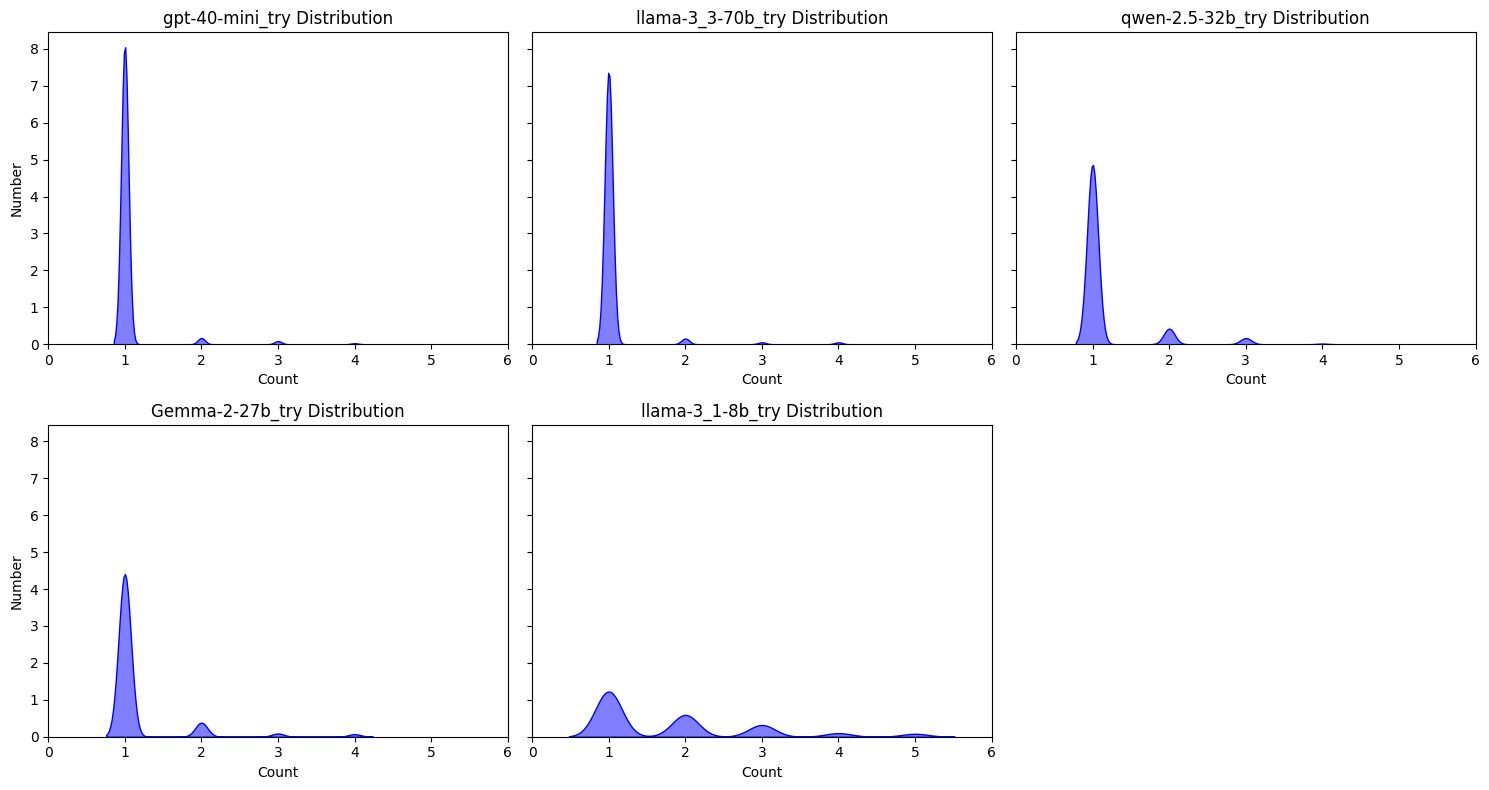

In [18]:
import seaborn as sns
import matplotlib.pyplot as plt

columns = ['gpt-40-mini_try', 'llama-3_3-70b_try', 'qwen-2.5-32b_try', 'Gemma-2-27b_try', 'llama-3_1-8b_try']

rows, cols = 2, 3
fig, axes = plt.subplots(rows, cols, figsize=(15, 8), sharey=True)

axes = axes.flatten()

for i, column in enumerate(columns):
    data = group_df[column].dropna().astype(int)
    sns.kdeplot(data, color='blue', fill=True, alpha=0.5, bw_adjust=0.5, ax=axes[i])
    axes[i].set_title(f"{column} Distribution")
    axes[i].set_xlabel("Count")
    axes[i].set_ylabel("Number")
    axes[i].set_xlim(0, 6)
    
for i in range(len(columns), len(axes)):
    fig.delaxes(axes[i]) 

plt.tight_layout()
plt.show()


In [65]:
index = 6
eval(group_df['gpt-4o-mini'][index])

{'groups': [{'summary': 'User expressed frustration about Karen forgetting to book the conference room for a meeting deadline on 2024-11-20.',
   'chat_logs': [0, 1, 2, 3]},
  {'summary': 'User and assistant discussed financial stability strategies, suggesting cooking at home and cancelling unused subscriptions.',
   'chat_logs': [4, 5, 6]},
  {'summary': 'User asked for help with a project on 2022-10-06, struggling to understand the concept.',
   'chat_logs': [7, 8, 9, 10, 11]},
  {'summary': "User reiterated their frustration about Karen's task negligence affecting work meetings on 2022-10-06.",
   'chat_logs': [12, 13, 14]}]}

In [66]:
eval(group_df['llama-3_3-70b'][index])

{'groups': [{'summary': "user's coworker Karen forgot to book conference room",
   'chat_logs': [0, 1, 2, 3]},
  {'summary': 'user and assistant discuss financial planning',
   'chat_logs': [4, 5, 6]},
  {'summary': 'assistant helps user with project concept',
   'chat_logs': [7, 8, 9]},
  {'summary': 'user reflects on past experience with Karen and project help',
   'chat_logs': [10, 11]},
  {'summary': 'user vents about Karen forgetting to book conference room again',
   'chat_logs': [12]},
  {'summary': 'user thanks assistant for past help with project',
   'chat_logs': [13, 14]}]}

In [67]:
eval(group_df['qwen-2.5-32b'][index])

{'groups': [{'summary': 'User frustrated with Karen forgetting to book the conference room for a meeting on 2024-11-20. User planned to talk to Karen about it and find solutions.',
   'chat_logs': [0, 1, 2, 3]},
  {'summary': 'Discussion on saving money by cooking at home and canceling unused subscriptions on 2024-11-20.',
   'chat_logs': [4, 5, 6]},
  {'summary': 'User sought help with a project concept from assistant on 2022-10-06. User appreciated the support given in past projects.',
   'chat_logs': [7, 8, 9, 10, 11, 12, 13, 14]}]}

In [68]:
eval(group_df['Gemma-2-27b'][index])

{'groups': [{'summary': 'User expresses frustration with coworker Karen forgetting to book a conference room for a team meeting.',
   'chat_logs': [0, 1, 2, 3]},
  {'summary': 'User and assistant discuss ways to save money as a team.',
   'chat_logs': [4, 5, 6]},
  {'summary': 'Assistant helps user understand a project concept they are struggling with.',
   'chat_logs': [7, 8, 9, 10, 11]},
  {'summary': 'User vents about Karen forgetting to book a conference room again and thanks the assistant for past help.',
   'chat_logs': [12, 13, 14]}]}

In [69]:
eval(group_df['llama-3_1-8b'][index])

{'groups': [{'summary': "user is frustrated with Karen forgetting to book the conference room for their team's meeting and can't reschedule due to deadline",
   'chat_logs': [0, 1, 2, 3]},
  {'summary': 'assistant advises user to talk to Karen about the issue and offers suggestions for improving communication and teamwork',
   'chat_logs': [4, 5, 6]},
  {'summary': 'user asks assistant for help with a project and gets support in understanding the concept',
   'chat_logs': [7, 8, 9, 10]},
  {'summary': "assistant shares an experience about user's past request for help on a project and offers to assist again if needed",
   'chat_logs': [11, 12, 13, 14]}]}